# QSM data exploration

In [35]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk

In [40]:
#1. Load QSM using SimpleITK
qsm_path_p1 = "/home/jbetancur/Desktop/Scripts_QSM/test/scan_2024/QSM/QSM_VSHARP_ppm.nii.gz"
qsm_img_p1 = sitk.ReadImage(qsm_path_p1)

#2. Extract data array and image info
# Note: SimpleITK's GetArrayFromImage returns a NumPy array with shape (z, y, x)
qsm_data_p1 = sitk.GetArrayFromImage(qsm_img_p1)
qsm_spacing_p1 = qsm_img_p1.GetSpacing()  # voxel dimensions (x, y, z)


In [ ]:
#1. Load QSM using SimpleITK
qsm_path = "/home/jbetancur/Desktop/Scripts_QSM/test/scan_2024_2/QSM/QSM_VSHARP_ppm.nii.gz"
qsm_img = sitk.ReadImage(qsm_path)

#2. Extract data array and image info
# Note: SimpleITK's GetArrayFromImage returns a NumPy array with shape (z, y, x)
qsm_data = sitk.GetArrayFromImage(qsm_img)
qsm_spacing = qsm_img.GetSpacing()  # voxel dimensions (x, y, z)




Data shape (z, y, x): (176, 256, 232)
Voxel dimensions (pixdim): (1.0, 1.0, 1.0)
Data type: 32-bit float
Min value ppm: -6.0242863
Max value ppm: 6.4047337
Mean ppm: -0.000111233676


In [42]:
#3. Print basic info
print("Patient 1")
print("Data shape (z, y, x):", qsm_data_p1.shape)
print("Voxel dimensions (pixdim):", qsm_spacing_p1)
print("Data type:", qsm_img_p1.GetPixelIDTypeAsString())

#4. Basic stats
print("Min value ppm:", np.min(qsm_data_p1))
print("Max value ppm:", np.max(qsm_data_p1))
print("Mean ppm:", np.mean(qsm_data_p1))

print("--------------------------------------------------")
print("Patient 2")
#3. Print basic info
print("Data shape (z, y, x):", qsm_data.shape)
print("Voxel dimensions (pixdim):", qsm_spacing)
print("Data type:", qsm_img.GetPixelIDTypeAsString())

#4. Basic stats
print("Min value ppm:", np.min(qsm_data))
print("Max value ppm:", np.max(qsm_data))
print("Mean ppm:", np.mean(qsm_data))


Patient 1
Data shape (z, y, x): (176, 256, 232)
Voxel dimensions (pixdim): (1.0, 1.0, 1.0)
Data type: 32-bit float
Min value ppm: -3.0135653
Max value ppm: 8.893551
Mean ppm: -3.119981e-05
--------------------------------------------------
Patient 2
Data shape (z, y, x): (176, 256, 232)
Voxel dimensions (pixdim): (1.0, 1.0, 1.0)
Data type: 32-bit float
Min value ppm: -6.0242863
Max value ppm: 6.4047337
Mean ppm: -0.000111233676


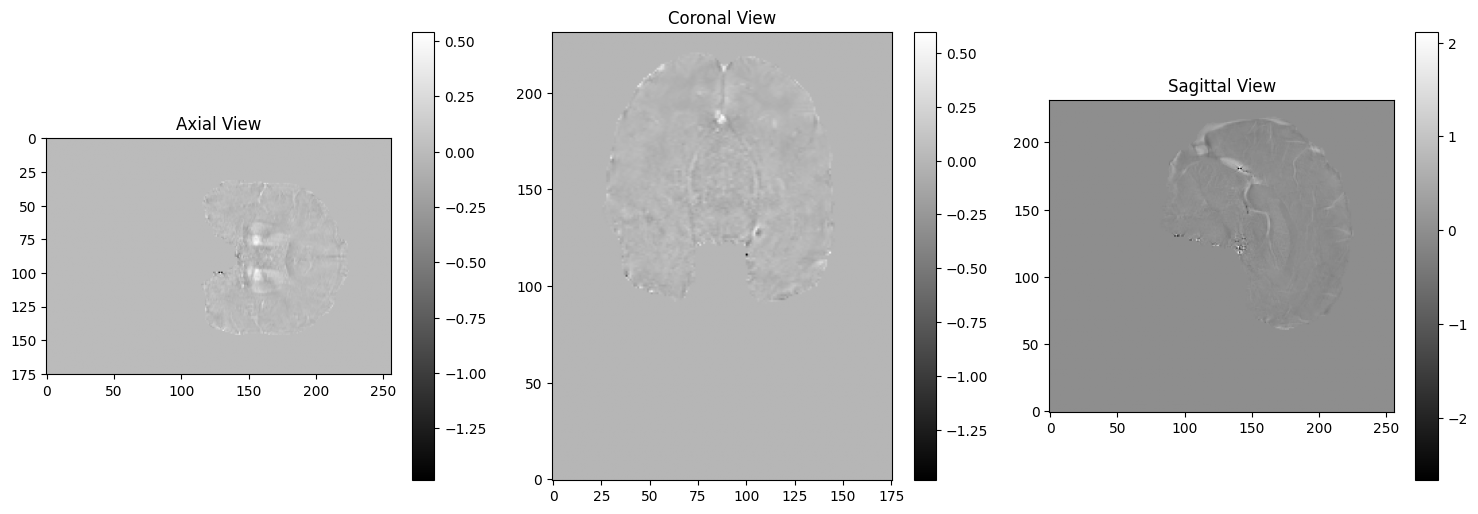

In [39]:
import matplotlib.pyplot as plt

# Calculate slice indices

z_slice = qsm_data.shape[2] // 2  # Axial slice (Z-axis)
y_slice = qsm_data.shape[1] // 2  # Coronal slice (Y-axis)
x_slice = qsm_data.shape[0] // 2  # Sagittal slice (X-axis)

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot axial slice
ax = axes[0]
im = ax.imshow(qsm_data[:, :, z_slice], cmap="gray")
ax.set_title("Axial View")
fig.colorbar(im, ax=ax)

# Plot coronal slice
ax = axes[1]
im = ax.imshow(qsm_data[:, y_slice, :].T, cmap="gray", origin="lower")
ax.set_title("Coronal View")
fig.colorbar(im, ax=ax)

# Plot sagittal slice
ax = axes[2]
im = ax.imshow(qsm_data[x_slice, :, :].T, cmap="gray", origin="lower")
ax.set_title("Sagittal View")
fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()
